### PyAudio

In [41]:
import pyaudio
import numpy as np

def get_note_name(frequency):
    note_names = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    A4_freq = 440.0
    semitone_ratio = 2 ** (1/12.0)

    try:
        num_semitones = round(12 * np.log2(frequency/ A4_freq))
        
    except:
        return f"empty"
    octave = num_semitones // 12
    note_index = num_semitones % 12

    return f"{note_names[note_index]}{octave}"

def analyze_audio_stream():
    CHUNK = 2**10
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RATE = 44100

    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)
    
    print("Listening...")

    try:
        while True:
            data = stream.read(CHUNK)
            audio_array = np.frombuffer(data, dtype = np.int16)
            print(audio_array)
            print(audio_array.shape)

            fft_result = np.fft.fft(audio_array)
            print(fft_result.shape)

            peak_freq_index = np.argmax(np.abs(fft_result))
            frequency = (peak_freq_index * RATE)/ CHUNK

            note_name = get_note_name(frequency)
            print(f"Detected frequency: {frequency:.2f} Hz | Note: {note_name}")


    except KeyboardInterrupt:
        pass
    finally:
        print('Stopped..')
        stream.stop_stream()
        stream.close()
        p.terminate()



In [42]:
analyze_audio_stream()

Listening...
[    0 32767 32766 ...  2109  2107  2071]
(1024,)
(1024,)
Detected frequency: 0.00 Hz | Note: empty
[2039 2137 2061 ... 1918 1868 1915]
(1024,)
(1024,)
Detected frequency: 0.00 Hz | Note: empty
[1919 1941 1928 ... 1625 1663 1656]
(1024,)
(1024,)
Detected frequency: 0.00 Hz | Note: empty
[1660 1662 1659 ... 1486 1505 1508]
(1024,)
(1024,)
Detected frequency: 0.00 Hz | Note: empty
[1481 1495 1512 ... 1335 1325 1313]
(1024,)
(1024,)
Detected frequency: 0.00 Hz | Note: empty
[1280 1229 1278 ... 1201 1200 1193]
(1024,)
(1024,)
Detected frequency: 0.00 Hz | Note: empty
[1197 1228 1256 ... 1083 1101 1088]
(1024,)
(1024,)
Detected frequency: 0.00 Hz | Note: empty
[1089 1093 1105 ... 1054 1075 1062]
(1024,)
(1024,)
Detected frequency: 0.00 Hz | Note: empty
[1044 1100 1052 ...  880  878  935]
(1024,)
(1024,)
Detected frequency: 0.00 Hz | Note: empty
[916 897 901 ... 735 737 748]
(1024,)
(1024,)
Detected frequency: 0.00 Hz | Note: empty
[755 663 729 ... 718 723 710]
(1024,)
(1024,)
D

### Librosa

In [7]:
import librosa
import IPython.display
import warnings
import numpy as np

warnings.simplefilter("ignore")


In [8]:
def sin_wave(amp, freq, time):
    return amp*np.sin(2*np.pi * freq * time)


In [9]:
sr = 22*1000.
ts = 1/sr

time = np.arange(0,1,ts)

DO = sin_wave(1, 261.6256, time)
MI = sin_wave(1, 329.6276, time)
SOL = sin_wave(1, 391.9954, time)

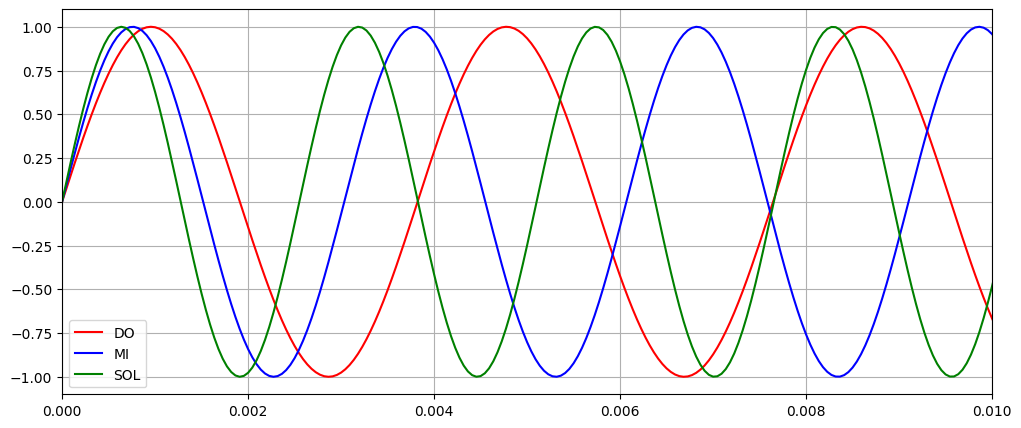

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(time, DO, label="DO", color='red')
plt.plot(time, MI, label="MI", color='blue')
plt.plot(time, SOL, label="SOL", color='green')
plt.xlim((0, 0.01))
plt.legend()
plt.grid()
plt.show()

In [11]:
IPython.display.Audio(data=MI, rate=sr)

In [12]:
sample_concat = np.concatenate((DO, MI, SOL))


In [13]:
def draw_wave(sample_sounds):
    plt.figure(figsize = (12, 6))
    librosa.display.waveshow(sample_sounds, alpha= 0.2)
    plt.xlabel("Time (s)"); plt.ylabel("Amplitude")
    plt.title("Waveform"); plt.show()

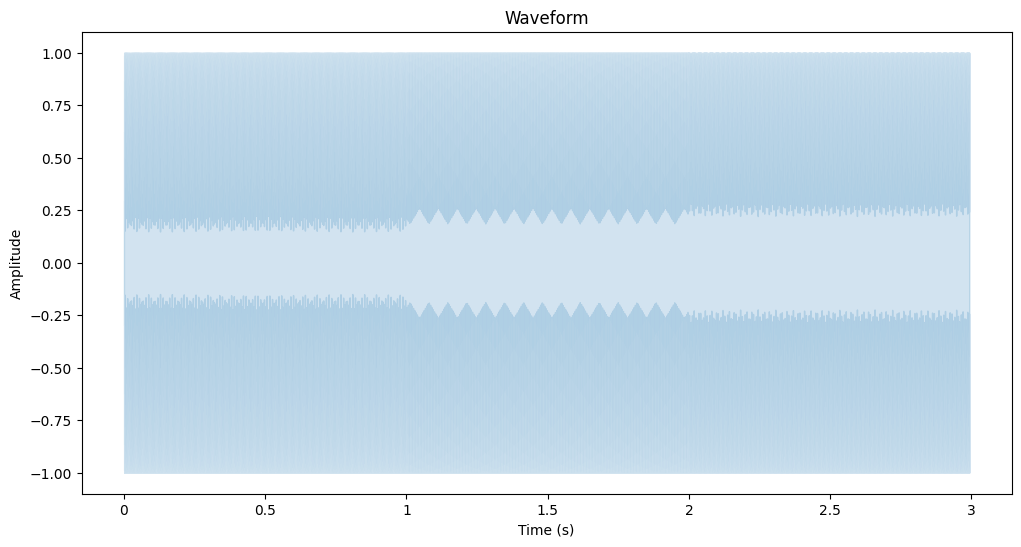

In [14]:
draw_wave(sample_concat)

In [15]:
def get_stft(sample_sounds):
    return librosa.stft(sample_sounds)


In [16]:
def draw_stft(sample_sounds, ylim = (None, None)):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(np.abs(get_stft(sample_sounds)),
                             y_axis='hz', x_axis='s')
    plt.ylim(ylim)
    plt.grid()
    plt.show()

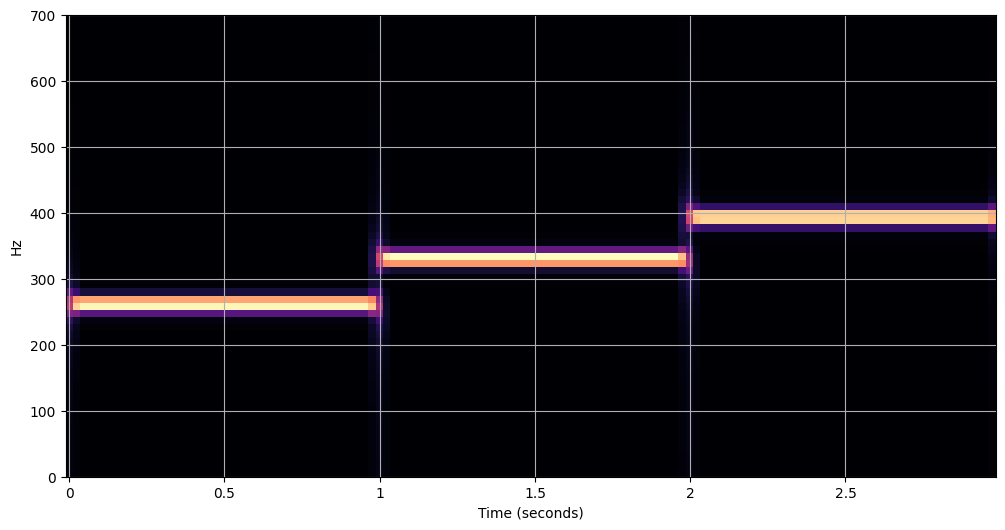

In [17]:
draw_stft(sample_concat, ylim=(0, 700))

In [29]:
DO.shape

(22000,)

In [30]:
result = get_stft(DO)
D = np.abs(result)
s_db = librosa.power_to_db(D, ref = np.max)
s_db


array([[-15.46802231, -18.48434887, -44.13037907, ..., -48.79276827,
        -44.06779666, -19.46530287],
       [-15.46389966, -18.47715221, -44.07853013, ..., -48.45489257,
        -44.01709936, -19.46410933],
       [-15.43844215, -18.45334179, -43.92439862, ..., -47.64540523,
        -43.86628352, -19.44167982],
       ...,
       [-44.02106281, -47.03136909, -80.        , ..., -80.        ,
        -63.32895004, -34.19587141],
       [-44.02109801, -47.03140041, -80.        , ..., -80.        ,
        -63.32896645, -34.19588728],
       [-44.02110374, -47.03141211, -80.        , ..., -80.        ,
        -63.32897194, -34.19589295]])

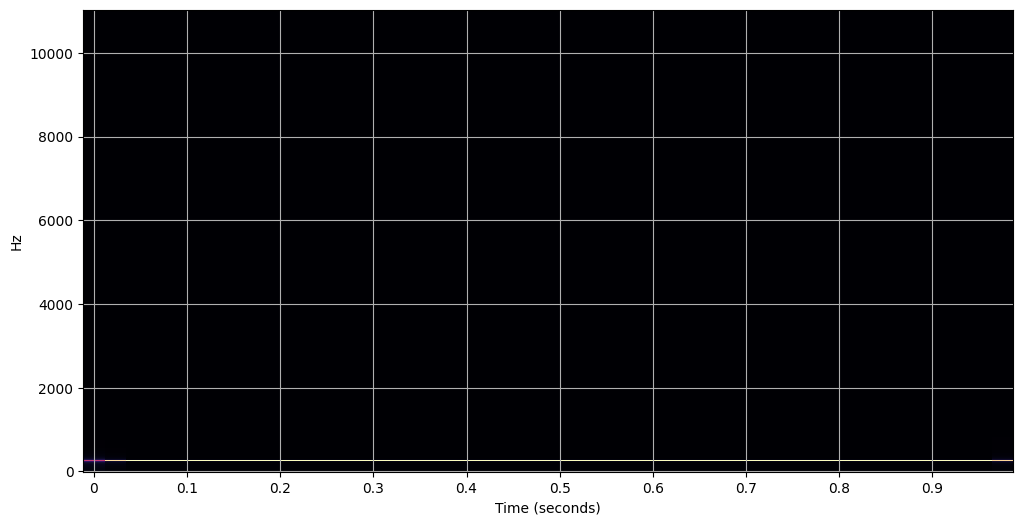

In [45]:
draw_stft(DO)

In [20]:
def get_chroma(sample_sounds, sr ):
    return librosa.feature.chroma_stft(S=np.abs(get_stft(sample_sounds)), sr=sr)

def draw_chroma(sample_sounds, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(get_chroma(sample_sounds, sr),
                             y_axis='chroma', x_axis='time')
    plt.grid()
    plt.show()

In [63]:
sr

22050

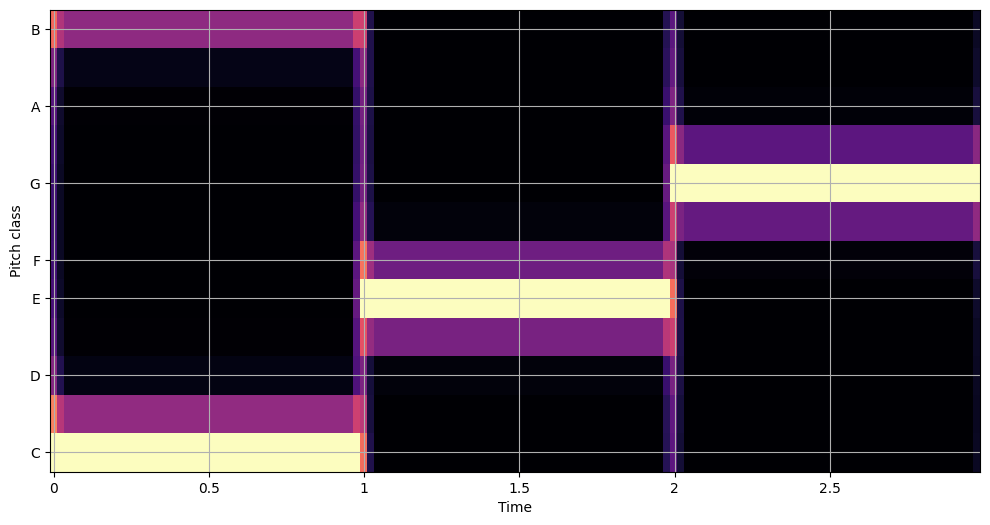

In [28]:
draw_chroma(sample_concat,sr)

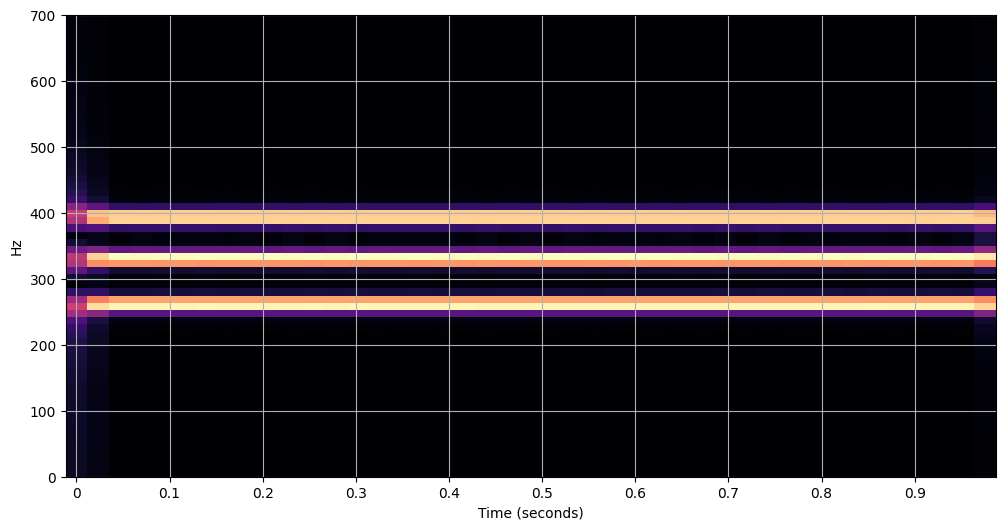

In [30]:
sum_samples = sum([DO, MI, SOL])
draw_stft(sum_samples, ylim=(0, 700))

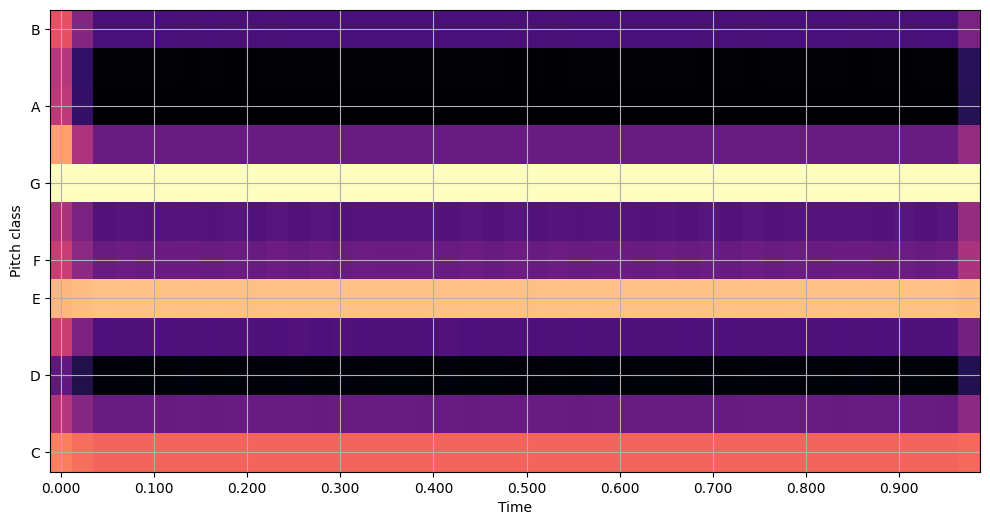

In [31]:
draw_chroma(sum_samples, sr)

In [64]:
voice, sr = librosa.core.load('./audio_input/test.wav')

In [65]:
sr

22050

In [47]:
result = get_stft(voice)
result.mean(axis=1)

array([ 3.2061939e-03+0.00000000e+00j, -2.1612046e-03+8.65814392e-04j,
        7.7086862e-04+1.07462663e-04j, ...,
       -1.9441530e-05-1.17742296e-07j,  3.8693768e-05+1.94378663e-05j,
       -5.8068494e-05+0.00000000e+00j], dtype=complex64)

In [67]:
result = get_chroma(voice, sr)
result.shape

(12, 340)

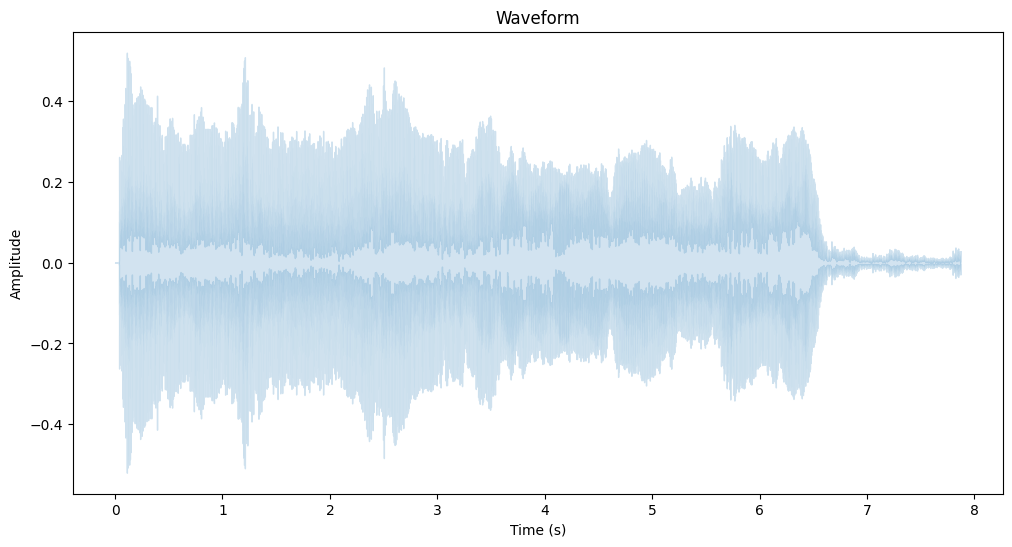

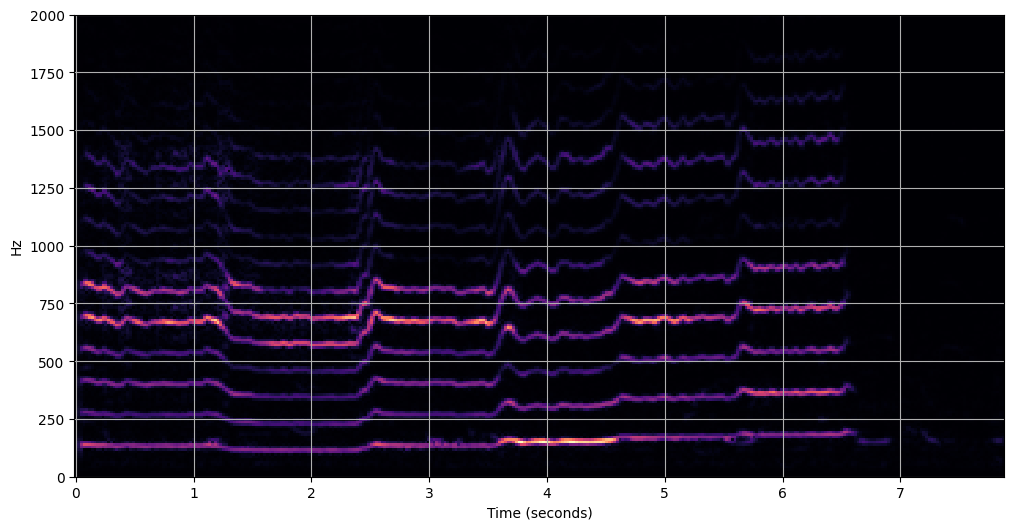

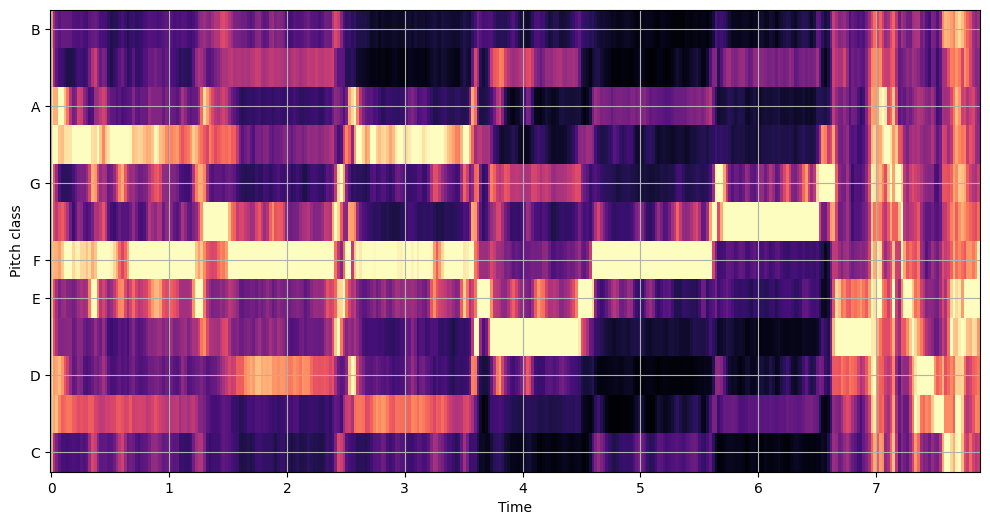

In [36]:
draw_wave(voice)
draw_stft(voice, ylim=(0,2000))
draw_chroma(voice, sr)

### PyAudio & Librosa

In [74]:
np.argmax(np.array([1,2,3,3,3]))

2

In [89]:
import pyaudio
import numpy as np

class PitchDetect:
    # note_names = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    note_names = ["도", "도#", "레", "레#", "미", "파", "파#", "솔", "솔#", "라", "라#", "시"]
    def get_stft(self,sample_sounds):
        return librosa.stft(sample_sounds)


    def get_chroma(self, sample_sounds, sr = 44100 ):
        return librosa.feature.chroma_stft(S=np.abs(self.get_stft(sample_sounds)), sr=sr)

    def get_note_name_from_sound(self, sample_sounds, sr = 44100):
        chroma_result = self.get_chroma(sample_sounds, sr = sr).mean(axis=1)
        note_index = np.argmax(np.abs(chroma_result))

        return f"{self.note_names[note_index]}"

    def get_note_name(self, frequency):
        if frequency<100.0:
            return 'empty'

        A4_freq = 440.0
        semitone_ratio = 2 ** (1/12.0)


        try:
            num_semitones = round(12 * np.log2(frequency/ A4_freq))
            
        except:
            return "empty"
        octave = num_semitones // 12
        note_index = num_semitones % 12

        return f"{self.note_names[note_index]} {octave}"

    def analyze_audio_stream(self):
        CHUNK = 2**10
        FORMAT = pyaudio.paFloat32
        CHANNELS = 1
        RATE = 44100

        p = pyaudio.PyAudio()

        stream = p.open(format=FORMAT,
                        channels=CHANNELS,
                        rate=RATE,
                        input=True,
                        frames_per_buffer=CHUNK)
        
        print("Listening...")

        try:
            while True:
                data = stream.read(CHUNK)
                audio_array = np.frombuffer(data, dtype = np.float32)

                result = np.fft.fft(audio_array)
                # result = self.get_stft(audio_array).mean(axis=1)

                peak_freq_index = np.argmax(np.abs(result))
                frequency = (peak_freq_index * RATE)/ CHUNK

                if frequency > 100:
                    note_name = self.get_note_name_from_sound(audio_array)
                else:
                    note_name = 'None'
                # note_name = self.get_note_name(frequency)
                # if frequency>=100:
                #     note_name += " "+self.get_note_name_from_sound(audio_array)

                print(f"\r Detected frequency: {frequency:.2f} Hz | Note: {note_name}", end ='')


        except KeyboardInterrupt:
            pass
        finally:
            print('\nStopped..')
            stream.stop_stream()
            stream.close()
            p.terminate()



In [90]:
detector = PitchDetect()
detector.analyze_audio_stream()

Listening...
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 86.13 Hz | Note: None
Detected frequency: 44013.87 Hz | Note: 파
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 0.00 Hz | Note: None
Detected frequency: 43.07 Hz | Note: None
Detected frequency: 44056.93 Hz | Note: 도#
Detected frequency: 0.00 Hz | Note: Non

In [6]:
from bisect import bisect_left
octave = [31, 63,127, 255, 511, 1023, 2047, 4095, 8191, 16383]
bisect_left(octave, 50.5)

1